# Springboard 2019 - Capstone

## Machine Learning: Word2Vec, PCA, and t-SNE


### Background
The following analysis steps were conducted to explore online professional profiles (OPP) information through machine learning techniques as part of my capstone project for the Springboard Intermediate Python for Data Science course. The data includes information on recent graduates in Canada and the U.S. to uncover patterns and trends and was pulled from a private data vendor. The data set includes data on employers, career paths, start dates, education (majors, degrees, etc.) and skills of youth / recent graduates. The final project will investigate skill cluster themes in relation to students' education and career paths.

* Broad project question: How are skills showing up in talent supply (in the U.S. and Canada)?

#### Review from Previous Steps: 
In my previous data storytelling and exploratory steps, I considered the following sub-questions: 

* Do students enter into the field they train for? How does this differ between countries and discipline?
* How many credentials do youth have? What kinds?
* What are the most common forms of entry-level work experience for recent graduates? Does this different by field of study or country?
* What is the average retention between occupations? Does this share any relationship with the discipline of study?
* What are the top skills by degree program?
* Can we see which degree programs are associated with faster entry and/or progression in/through the labour market?
* What mix of skills are showing up? By degree program? Level of credential?

I also explored where there are variables that are particularly relevant in explainin the answer to our set of questions and whether there are strong correlations between pairs of independent variables / independent and dependent variables. 


#### Sources: 

1. https://radimrehurek.com/gensim/models/word2vec.html

2. https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

3. https://medium.com/@aneesha/using-tsne-to-plot-a-subset-of-similar-words-from-word2vec-bb8eeaea6229

4. https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b?

5. https://towardsdatascience.com/a-beginners-guide-to-word-embedding-with-gensim-word2vec-model-5970fa56cc92

6. https://www.machinelearningplus.com/nlp/gensim-tutorial/#14howtotrainword2vecmodelusinggensim


### Code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

#read in data file
df = pd.read_csv('SB19-Can-US-Main.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_2_type,degree_3_type,degree_4_type,job_count,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,NaN,NaN,NaN,2,1,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res..."
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ot,NaN,NaN,0,2,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi..."
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,NaN,NaN,NaN,2,1,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma..."
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,ma,NaN,NaN,3,2,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n..."
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,se,Ot,NaN,4,3,1.0,4.0,1.0,6.0,hoists


In [2]:
# create columns to indicate level of education experience --> did this before
df['ba'] = np.where((df['degree_1_type'] == 'ba') | (df['degree_2_type'] == 'ba') | (df['degree_3_type'] == 'ba') | (df['degree_4_type'] == 'ba'), 
       1, 0)
df['ma'] = np.where((df['degree_1_type'] == 'ma') | (df['degree_2_type'] == 'ma') | (df['degree_3_type'] == 'ma') | (df['degree_4_type'] == 'ma'), 
       1, 0)
df['do'] = np.where((df['degree_1_type'] == 'do') | (df['degree_2_type'] == 'do') | (df['degree_3_type'] == 'do') | (df['degree_4_type'] == 'do'), 
       1, 0)
df['Ot'] = np.where((df['degree_1_type'] == 'Ot') | (df['degree_2_type'] == 'Ot') | (df['degree_3_type'] == 'Ot') | (df['degree_4_type'] == 'Ot'), 
       1, 0)

df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,degree_count,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list,ba,ma,do,Ot
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,1,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res...",1,0,0,0
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi...",0,0,0,1
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,1,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma...",1,0,0,0
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,2,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n...",1,1,0,0
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,3,1.0,4.0,1.0,6.0,hoists,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753315 entries, 0 to 753314
Data columns (total 57 columns):
id                  753315 non-null object
country             753315 non-null object
job_1               600101 non-null object
job_2               513927 non-null object
job_3               430154 non-null object
job_4               338815 non-null object
job_5               250366 non-null object
job_6               174365 non-null object
employer_1          599972 non-null object
employer_2          517602 non-null object
employer_3          436531 non-null object
employer_4          349101 non-null object
employer_5          263586 non-null object
employer_6          188717 non-null object
job_start_year_1    602643 non-null float64
job_start_year_2    515466 non-null float64
job_start_year_3    431095 non-null float64
job_start_year_4    339270 non-null float64
job_start_year_5    250514 non-null float64
job_start_year_6    174248 non-null float64
industry_list_1     617

In [28]:
## Note: Our data set has good structure, but we were limited in the statistical inference we could make in connecting skill themes.
### Extract skills column and process for Word2vec

from gensim.models import Word2Vec

# convert sentence string to word string
df['skills'] = df.skill_list.str.split(',')

In [29]:
df.head()

,id,country,job_1,job_2,job_3,job_4,job_5,job_6,employer_1,employer_2,...,time_job_2,time_job_3,time_job_4,time_job_1_4,skill_list,ba,ma,do,Ot,skills
0,UvVMY-N9uT9i6wdg8nX-sQ_0000,US,adjunct faculty,chemist,NaN,NaN,NaN,NaN,dixie state university,washington county water conservancy district,...,1.0,NaN,NaN,NaN,"microsoft office,microsoft word,powerpoint,res...",1,0,0,0,"[microsoft office, microsoft word, powerpoint,..."
1,1fFD-E25MpwW8uvA0gwOWw_0000,US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"household,writing,reflection,transferring,admi...",0,0,0,1,"[household, writing, reflection, transferring,..."
2,wRdXL4mwhnUGdwg7eVAFYQ_0000,US,marketing associate,product manager,NaN,NaN,NaN,NaN,new york life insurance company,american express,...,5.0,NaN,NaN,NaN,"facebook,management,powerpoint,social media,ma...",1,0,0,0,"[facebook, management, powerpoint, social medi..."
3,gMzn1TIgTl-etAKXbJipZQ_0000,US,summer intern,internship,software engineer,NaN,NaN,NaN,itri,itri,...,2.0,2.0,NaN,NaN,"matlab,python,objective c,r,machine learning,n...",1,1,0,0,"[matlab, python, objective c, r, machine learn..."
4,IrpjwrXdzNecrwwzdTH1-w_0000,US,maintance,mechanic,mechanic,maintenance worker,NaN,NaN,toyotaid,rosnett trucking,...,1.0,4.0,1.0,6.0,hoists,0,0,0,1,[hoists]


In [30]:
# convert to list of list format
df_skills = df['skills'].values.tolist()
df_skills[:4]

[['microsoft office',
  'microsoft word',
  'powerpoint',
  'research',
  'microsoft excel',
  'english',
  'public speaking',
  'customer service',
  'windows',
  'outlook'],
 ['household',
  'writing',
  'reflection',
  'transferring',
  'administrative assistance',
  'parental involvement',
  'pools',
  'dance',
  'printing',
  'prospects',
  'payments',
  'insurance',
  'community',
  'students',
  'motivational speaking',
  'san',
  'classroom management',
  'scholarships',
  'travel',
  'texas',
  'management',
  'calls',
  'parenthood',
  'checking',
  'initiation',
  'spanish',
  'worship',
  'powerpoint',
  'trees',
  'languages',
  'business services',
  'disciplinary',
  'education',
  'english',
  'photography',
  'bilingual',
  'offering',
  'cleaning',
  'reports',
  'singing',
  'hotels',
  'microsoft office',
  'microsoft excel',
  'testing',
  'vocalist',
  'policy',
  'customer service',
  'invites',
  'system monitoring',
  'disabilities',
  'drawing',
  'written',
 

### Training using Word2Vec

In [31]:
#Train the model
model = Word2Vec(df_skills, min_count=5, size= 100, workers=3, window =3, sg = 1)

In [32]:
# Test for similarities

## Specialized Skills
w1 = 'python'
model.wv.most_similar (positive=w1)

[('c/c++ stl', 0.7719887495040894),
 ('visual c#', 0.7640200853347778),
 ('x86 assembly', 0.7309110164642334),
 ('turbo pascal', 0.7166173458099365),
 ('automated software testing', 0.7165501117706299),
 ('ssh client', 0.7000510692596436),
 ('unity3d', 0.6986072063446045),
 ('c# programming', 0.6891084909439087),
 ('visual basic .net vb.net', 0.6879999041557312),
 ('computer language', 0.6835923790931702)]

In [33]:
## Note: there could be more rigorous data processing on skills names. For future work. 

w2 = 'graphic design'
model.wv.most_similar (positive=w2)

[('magazine layout design', 0.7744506597518921),
 ('visual communication', 0.7728269100189209),
 ('web graphics', 0.7491277456283569),
 ('concrete5', 0.7487225532531738),
 ('digital photography', 0.748201847076416),
 ('editorial design', 0.7472622990608215),
 ('bookbinding', 0.739345908164978),
 ('ux research', 0.7381036877632141),
 ('dreamweaver', 0.7313796281814575),
 ('design production', 0.7307668328285217)]

In [34]:
## Essential Skills
w3 = 'communication'
model.wv.most_similar (positive=w3)

[('case analysis', 0.7060714960098267),
 ('highly motivated self starter', 0.7010154724121094),
 ('strong verbal and written communication skills', 0.687983512878418),
 ('interpersonal communication skills', 0.6853305697441101),
 ('exceptional public speaker', 0.683198094367981),
 ('highly articulate', 0.6818545460700989),
 ('goal analysis', 0.6802095174789429),
 ('outstanding interpersonal communication skills', 0.677959680557251),
 ('macintosh applications', 0.6753221154212952),
 ('helping clients', 0.6737239360809326)]

In [35]:
# Measuring Euclidean similarity between different skills
## Note: Euclidian similarity does not perform well on high-dimensional vectors; will come back to this
model.wv.similarity(w1='python', w2='r')

0.2753569433434768

In [36]:
model.wv.similarity(w1='python', w2='microsoft excel')

0.36973923272673165

In [37]:
model.wv.similarity(w1='python', w2='java')

0.5279096576692381

In [38]:
model.wv.similarity(w1='python', w2='matlab')

0.34172196833177393

In [39]:
# Measuring similarity between the same skill --> as a check
model.wv.similarity(w1='python', w2='python')

1.0

In [57]:
# Model is performing well, so we'll save
model.save('model_wv1')

C:\Users\tj4sy\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
UsageError: Line magic function `%_MIGRATION_NOTES_URL` not found.


### Visualizing using PCA and t-SNE

In [41]:
sns.set_style("darkgrid")
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [42]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    # set up the array
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # Reduces the dimensionality from 100 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

Note: Code adapted from Source 2. 

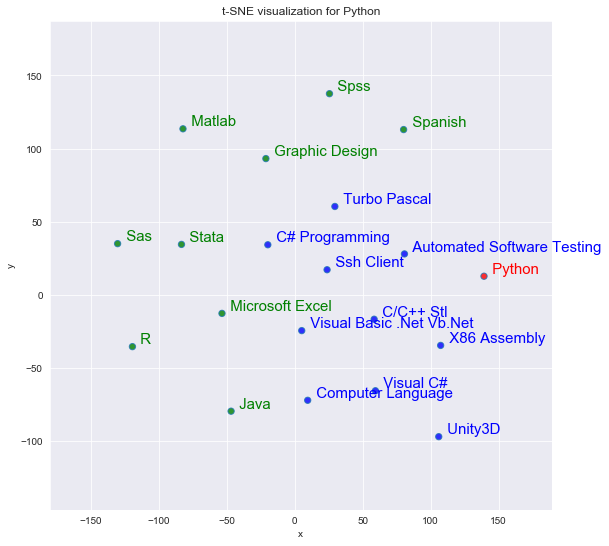

In [44]:
# Test scatterplot --> Python compared to 10 other skills
tsnescatterplot(model, 'python', ['r', 'microsoft excel', 'java', 'matlab', 'stata', 'spss', 'sas', 'graphic design', 'spanish'])

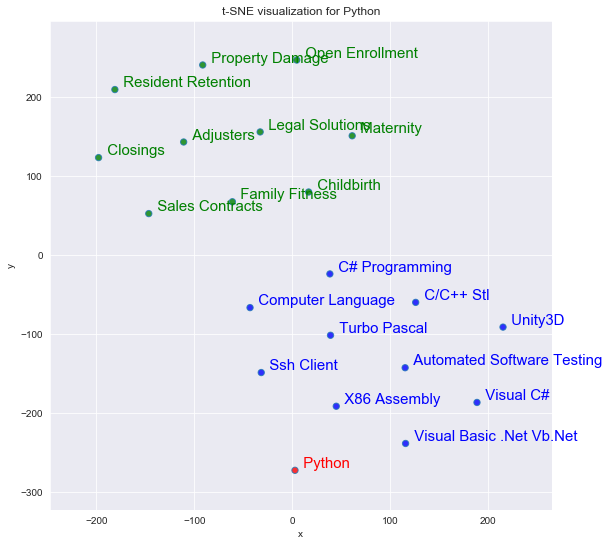

In [45]:
# Test scatterplot 10 most similar to 10 least similar skills
tsnescatterplot(model, 'python', [i[0] for i in model.wv.most_similar(negative=["python"])])

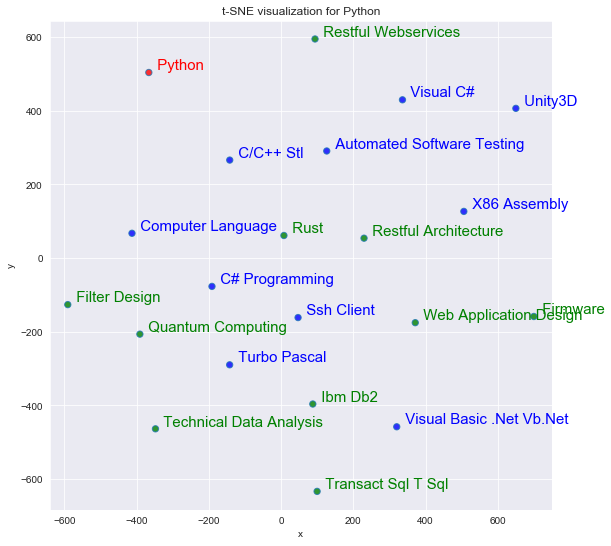

In [46]:
# Test 10 most similar skills to 11-20 other similar skills
tsnescatterplot(model, "python", [t[0] for t in model.wv.most_similar(positive=["python"], topn=20)][10:])

In [58]:
## Note: our model seems to be performing well from our PCA and visualizing using t-SNE.

### The next steps we'll perform in order to create more business value from the analysis is to construct clusters from our word embeddings. 
### To be continued...


### Conclusion: Part 1 - Word2Vec, PCA, t-SNE
* I've successfully used Word2Vec from the gensim library in Python to create word embeddings in order to give our skills column more structure. The first model with the word embeddings can be used to calculate the distance between skills and shows us even from our brief exploration of the data a use case on estimating the distance and similarity of technical programming skills. We are surprised to see that Python and R are not as similar as one might expect, but Python does appear next to more technical and engineer-focused programming languages. 
* I've also been able to visualize the results using Principal Component Analysis (PCA) and t-SNE, using our test case in assessing skills similar to and dissimlar to Python. 

### Future Work: Part 2 - Model Refinements and Clustering
To expand the analysis and make more applicable to the business case, I will continue to: 
* Continue to refine and experiment with the model parameters in our Word2Vec implimentation. 
* Expand to incorporate data from other countries to see how the results might change. 
* Using clustering algorithms from the sklearn library to explore and visualize how skill clusters show up and compare against demand-side sources from supply-demand analysis.

The end result of the project should give enough structure on the skills data to further explore themes related to education and career pathways, as well as measure against other soures of labour market information.